#Примеры практических задач восстановления регрессии

Используются как правило для прогнозирования.

Оценка стоимости недвижимости по обстановке: характеристике района, экологической обстановке, транспортной развязке оценить стоимость.

Прогноз свойств соединений: по параметрам
химических элементов спрогнозировать температуру
плавления, электропроводность, теплоёмкость
получаемого соединения.

Медицина: по постоперационным показателям оценить
время заживления органа.

Кредитный скоринг: по анкете заёмщика оценить
величину кредитного лимита.

Инженерное дело: по техническим характеристикам
автомобиля и режиму езды спрогнозировать расход
топлива.


#Lasso


Импортирую набор данных о ценах на жильё в Бостонпе и печатаю, чтобы посмотреть на данные.


In [0]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.DESCR) 

(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - P

In [0]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
data['MEDV'] = pd.Series(data=boston.target, index=data.index)
data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
X = data.drop('MEDV', axis = 1) 
Y = data['MEDV'] 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Выбираю случайным образом треть данных в качестве тестового набора. Таким образом, модель обучается на 2/3 и тестируется на оставшейся части.

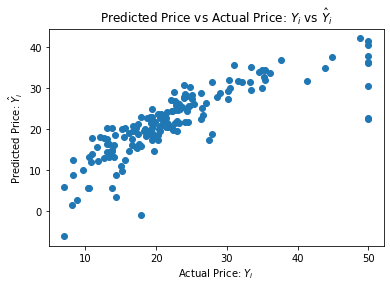

In [0]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1) 
ls.fit(X_train,Y_train)
Y_pred_train = ls.predict(X_train) 
Y_pred = ls.predict(X_test) 
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual Price: $Y_i$")
plt.ylabel("Predicted Price: $\hat{Y}_i$")
plt.title("Predicted Price vs Actual Price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

Получаю среднеквадратичную ошибку и r^2 для обучения и тестирования

In [0]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error: on training data: ',mean_squared_error(Y_train,Y_pred_train), '| And on Testing data',mean_squared_error(Y_test,Y_pred))
print('R-Squared Error: on training data: ',r2_score(Y_train,Y_pred_train), '| And on Testing data',r2_score(Y_test,Y_pred))

Mean Squared Error: on training data:  20.07862315273765 | And on Testing data 30.653771741798355
R-Squared Error: on training data:  0.7484704833754667 | And on Testing data 0.6730050098150877


In [0]:
print('Intercept: ',ls.intercept_) 
print('Coefficients: \n',ls.coef_)

Intercept:  26.203668082786965
Coefficients: 
 [-0.14498288  0.0406458  -0.0674628   0.         -0.          3.79511624
 -0.01870347 -1.11734441  0.31433301 -0.01535548 -0.85375257  0.01150501
 -0.51268625]
